In [1]:
#Brother moody 385-208-2201
import os
os.getcwd()

'C:\\Users\\josep\\OneDrive\\Documents\\Para la Escuela\\Research\\Network Theory\\EquitablePartitions\\Jupyter_notebooks'

In [2]:
import os,sys
os.chdir('../Data/git_web_ml')
#os.getcwd()

In [3]:
import pandas as pd
import networkx as nx
from importlib import reload
import inspect
import csv
import sys
#os.listdir()

In [15]:
#reloading cell
reload(graphs)
#delete if necessary
#del sys.modules['graphs']

<module 'graphs' from 'C:\\Users\\josep\\OneDrive\\Documents\\Para la Escuela\\Research\\Network Theory\\EquitablePartitions\\graphs.py'>

In [4]:
# use this to get the function list of a module
from inspect import getmembers, isfunction
#function_list = getmembers(sys.modules['networkx'],isfunction)

# Git Hub Social Network

In [4]:
git_df = pd.read_csv('musae_git_edges.csv')

In [5]:
git_nx = nx.read_edgelist('musae_git_edges.csv',delimiter=',',comments='id_1')

In [6]:
os.chdir('../..')

In [7]:
import numpy as np
import os, sys
from importlib import reload
from matplotlib import pyplot as plt
from tqdm import tqdm
import networkx as nx
import ep_finder, lep_finder, graphs

In [8]:
relabeledGraph = graphs.relabel(git_nx)
ep_dict, lep_list, coarsestAndLocal = lep_finder.getEquitablePartitions(relabeledGraph,progress_bars=True)

Finding Coarsest EP...
 [####################################################################################################] 100%
FINDING LEPS...
 [####################################################################################################] 100%


In [11]:
# total number of nodes in network
len(git_nx)

37700

Nontrivial nodes progress:287/681


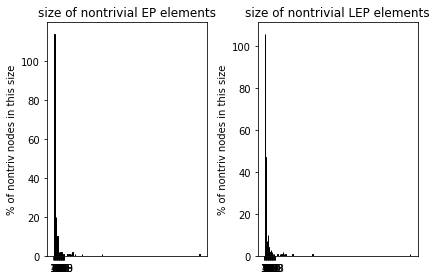

In [16]:
nontrivEp_dict_git,nontrivLep_list_git,hist_list, perc = graphs.NontrivialityData(git_nx,ep_dict,lep_list,return_vals=True)

In [16]:
#nontrivLep_list_git

# Local Decomposition of Dolores:

In [12]:
Dolores = graphs.getDolores()
relabeledDol = graphs.relabel(Dolores)
ep_dict, lep_list, coasestAndLocal = lep_finder.getEquitablePartitions(relabeledDol,progress_bars=False)

In [13]:
import pprint
fullSpec = np.round(nx.adjacency_spectrum(relabeledDol),3)
dolDivSpec = np.round(nx.adjacency_spectrum(graphs.genDivGraph(relabeledDol,ep_dict),3))

localSpec = graphs.GetLocalSpec(relabeledDol,ep_dict,lep_list)
againGDiv = graphs.genDivGraph(relabeledDol,ep_dict)

pretty = pprint.PrettyPrinter(width=30)
print("Local spectrum decomposition: \n")
pretty.pprint(localSpec)
print('\n')
print("full spectrum: \n")
pretty.pprint(list(fullSpec))

Local spectrum decomposition: 

({'Original Graph Divisor': array([-3.465+0.j, -2.575+0.j,  3.695+0.j,  2.715+0.j,  1.793+0.j,
       -0.897+0.j,  0.519+0.j,  0.214+0.j]),
  '{0, 3}': array([ 2.303+0.j,  2.115+0.j, -1.861+0.j, -0.254+0.j, -1.303+0.j,
       -1.   +0.j,  1.   +0.j, -1.   +0.j]),
  '{0, 3} Divisor': array([ 2.303+0.j, -1.303+0.j]),
  '{1, 4}': array([-2.   +0.j, -1.414+0.j, -0.   +0.j,  2.   +0.j,  1.414+0.j,
       -1.414+0.j, -0.   +0.j,  1.414+0.j]),
  '{1, 4} Divisor': array([ 2.+0.j, -2.+0.j]),
  '{2, 6}': array([ 2.+0.j,  1.+0.j, -2.+0.j,  1.+0.j, -1.+0.j, -1.+0.j]),
  '{2, 6} Divisor': array([-1.+0.j,  2.+0.j]),
  '{5}': array([0.+0.j]),
  '{5} Divisor': array([0.+0.j]),
  '{7}': array([0.+0.j]),
  '{7} Divisor': array([0.+0.j])},
 array([ 3.695+0.j, -3.465+0.j,  2.715+0.j, -2.575+0.j,  2.115+0.j,
        1.793+0.j, -1.861+0.j, -0.254+0.j,  0.214+0.j,  0.519+0.j,
       -0.897+0.j, -2.   +0.j, -0.   +0.j, -1.414+0.j, -1.414+0.j,
        1.414+0.j,  1.414+0.j, -0. 

| Total Graph Spectrum | LEP1 {0,3} | LEP2 {1,4} | LEP3 {2,6} | LEP4 {5} | LEP {7} |
| -------------------- | ---------- | ---------- | ---------- | -------- | ------- |
|          1           | ---------- | ---------- | ---------- | -------- | ------- |
|          1           | ---------- | ---------- | ---------- | -------- | ------- |
|          1           | ---------- | ---------- | ---------- | -------- | ------- |
|         -1           | ---------- | ---------- | ---------- | -------- | ------- |
|         -1           | ---------- | ---------- | ---------- | -------- | ------- |
|         -1           | ---------- | ---------- | ---------- | -------- | ------- |
| -------------------- | ---------- | ---------- | ---------- | -------- | ------- |
| -------------------- | ---------- | ---------- | ---------- | -------- | ------- |
| -------------------- | ---------- | ---------- | ---------- | -------- | ------- |
| -------------------- | ---------- | ---------- | ---------- | -------- | ------- |
| -------------------- | ---------- | ---------- | ---------- | -------- | ------- |
| -------------------- | ---------- | ---------- | ---------- | -------- | ------- |
| -------------------- | ---------- | ---------- | ---------- | -------- | ------- |
| -------------------- | ---------- | ---------- | ---------- | -------- | ------- |
| -------------------- | ---------- | ---------- | ---------- | -------- | ------- |
| -------------------- | ---------- | ---------- | ---------- | -------- | ------- |
| -------------------- | ---------- | ---------- | ---------- | -------- | ------- |
| -------------------- | ---------- | ---------- | ---------- | -------- | ------- |
| -------------------- | ---------- | ---------- | ---------- | -------- | ------- |
| -------------------- | ---------- | ---------- | ---------- | -------- | ------- |
| -------------------- | ---------- | ---------- | ---------- | -------- | ------- |
| -------------------- | ---------- | ---------- | ---------- | -------- | ------- |
| -------------------- | ---------- | ---------- | ---------- | -------- | ------- |
| -------------------- | ---------- | ---------- | ---------- | -------- | ------- |




In [14]:
ep_dict, lep_list, coarsestAndLocal = lep_finder.getEquitablePartitions(relabeledDol,progress_bars=True)

Finding Coarsest EP...
 [####################################################################################################] 100%
FINDING LEPS...
 [####################################################################################################] 100%


Nontrivial nodes progress:2/3
Total percentage on nontrivial nodes: 0.9166666666666666
Total pairs in partition elements: 2
Percentage of nontrivial nodes in pairs: 0.18181818181818182


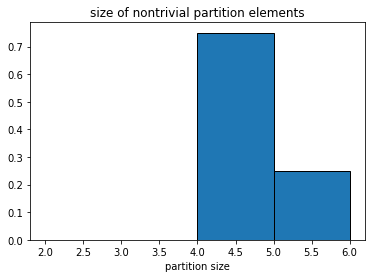

TypeError: cannot unpack non-iterable NoneType object

In [15]:
nontEP_dict_dol,nontLEP_list_dol, perc_dol = graphs.NontrivialityData(relabeledDol,ep_dict,lep_list)

# Facebook Graph Analysis:

In [14]:
#os.chdir('Data')
facebookG = graphs.getFacebookGraph()

FileNotFoundError: [Errno 2] No such file or directory: 'facebook_combined.txt'

In [25]:
relabeledGraph = graphs.relabel(facebookG)
ep_dict, lep_list, coarsestAndLocal = lep_finder.getEquitablePartitions(relabeledGraph,progress_bars=True)

Finding Coarsest EP...
 [####################################################################################################] 100%
FINDING LEPS...
 [####################################################################################################] 100%


In [26]:
nontrivEp_dict,nontrivLep_list, perc = graphs.NontrivialityData(relabeledGraph,ep_dict,lep_list)

Filtering leps progress: 2326/3865


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [27]:
perc

0.06288685318148056

# Google Plus Network Analysis

## Note: this one is huge and takes jupyter a long time to do anything with start when have more time.

In [35]:


os.getcwd()

'C:\\Users\\josep\\OneDrive\\Documents\\Para la Escuela\\Research\\Network Theory\\EquitablePartitions\\Data'

In [ ]:
# This cell kills computers because of the size of the graph, tenga cuidado
#gPlusNet = nx.read_edgelist("gplus_combined.txt.gz",create_using=nx.DiGraph)

In [ ]:
relabeledGraph = graphs.relabel(gPlusNet)

In [ ]:
ep_dict, lep_list, coarsestAndLocal = lep_finder.getEquitablePartitions(relabeledGraph,progress_bars=True)

# Twitter Network Analysis:

In [26]:
os.chdir('Data/Social_Networks')

In [37]:
len(twitterNet)

81306

In [38]:
12248/81306

0.1506407891176543

In [35]:
twitterNet = nx.read_edgelist("twitter_combined.txt.gz",create_using=nx.DiGraph)

In [36]:
# getting strongly connected components
total=0
for part in nx.strongly_connected_components(twitterNet):
    total+=1
print(total)

12248


In [40]:
relabeledGraph = graphs.relabel(twitterNet)

In [41]:
ep_dict, lep_list, coarsestAndLocal = lep_finder.getEquitablePartitions(relabeledGraph, progress_bars=True)

Finding Coarsest EP...
 [####################################################################################################] 100%
FINDING LEPS...
 [####################################################################################################] 100%


In [31]:
# QUESTION: can singletons all be in one lep but all in their own ep partition element?

Nontrivial nodes progress:2659/2660
Total percentage on nontrivial nodes: 0.1878213169999754


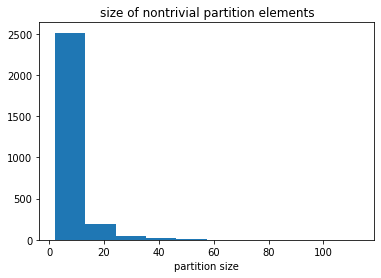

In [43]:
nontrivEp_dict,nontrivLep_list,hist_list,perc = graphs.NontrivialityData(twitterNet,ep_dict,lep_list)

In [44]:
len(list(nontrivEp_dict.keys()))

2790

In [45]:
2790/12248

0.22779229261920314

In [33]:
perc

0.1878213169999754

# Wiki vote Network Analysis:

In [16]:
os.getcwd()
#os.chdir('./Data/Social_Networks')
os.chdir('Social_Networks')

In [29]:
wiki_vote_net = nx.read_edgelist("wiki-Vote.txt.gz",create_using=nx.DiGraph) # changed it to undirected

In [34]:
total=0
for part in nx.strongly_connected_components(wiki_vote_net):
    total+=1
print(total)

5816


In [18]:
relabeledGraph = graphs.relabel(wiki_vote_net)

In [19]:
ep_dict_wiki, lep_list_wiki, coarsestAndLocal = lep_finder.getEquitablePartitions(relabeledGraph, progress_bars=True)

Finding Coarsest EP...
 [####################################################################################################] 100%
FINDING LEPS...
 [####################################################################################################] 100%


In [20]:
len(wiki_vote_net)

7115

Nontrivial nodes progress:1/2
Total percentage on nontrivial nodes: 0.6751932536893887


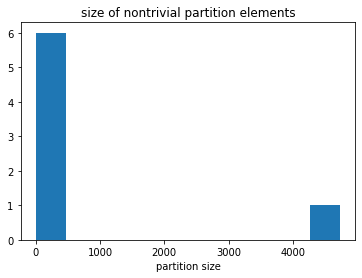

ValueError: not enough values to unpack (expected 4, got 3)

In [21]:
nontrivEp_dict_wiki,nontrivLep_list_wiki, hist_list,perc = graphs.NontrivialityData(wiki_vote_net,ep_dict_wiki,lep_list_wiki)

In [22]:
nx.number_connected_components(relabeledGraph)

NetworkXNotImplemented: not implemented for directed type

In [42]:
perc

0.6751932536893887

In [40]:
nontrivEp_dict_wiki.keys()

dict_keys([0, 1, 2, 3, 1886, 2305, 2306])

In [41]:
# interesting, only 2 leps
nontrivLep_list_wiki

[{0, 1, 2, 3, 2305, 2306}, {1886}]

In [82]:
# size doesn't seem to be the correlation in the first lep.
for partEl in nontrivLep_list_wiki[0]:
    print(len(nontrivEp_dict_wiki[partEl]))

4734
47
12
5
2
2


# Deezer Network Analysis

In [44]:
#os.chdir('deezer_europe/deezer_europe')

In [52]:
deez_nx = nx.read_edgelist("deezer_europe_edges.csv",delimiter=',',comments='node_1')

In [54]:
len(deez_nx)  # checking to make sure graph was read in correctly

28281

In [55]:
relabeledGraph = graphs.relabel(deez_nx)
ep_dict_deez,lep_list_deez,_ = lep_finder.getEquitablePartitions(relabeledGraph,progress_bars=True)

Finding Coarsest EP...
 [####################################################################################################] 100%
FINDING LEPS...
 [####################################################################################################] 100%


In [56]:
nontEP_dict_deez, nontLep_list_deez, perc = graphs.NontrivialityData(relabeledGraph,ep_dict_deez,lep_list_deez)

Nontrivial nodes progress:897/1287


In [57]:
perc

0.16134507266362574

# Epinions Trust Network Analysis:

In [63]:
#os.chdir('EquitablePartitions/Data')

In [64]:
os.getcwd()

'C:\\Users\\josep\\OneDrive\\Documents\\Para la Escuela\\Research\\Network Theory\\EquitablePartitions\\Data'

In [65]:
Eph_nx = nx.read_edgelist("soc-Epinions1.txt.gz")

In [66]:
relabeledGraph = graphs.relabel(Eph_nx)
ep_dict_eph, lep_list_eph,_ = lep_finder.getEquitablePartitions(relabeledGraph)

Finding Coarsest EP...
 [####################################################################################################] 100%
FINDING LEPS...
 [####################################################################################################] 100%


In [67]:
nontEp_dict_eph,nontLep_list_eph, perc = graphs.NontrivialityData(relabeledGraph,ep_dict_eph,lep_list_eph)

Nontrivial nodes progress:7018/7291


In [68]:
perc

0.3996757996283557